# Принятие решений в бизнесе. Анализ А/B теста интернет магазина.

## Описание данных
 ### Данные для первой части 

Файл /datasets/hypothesis.csv. Скачать датасет

- Hypothesis — краткое описание гипотезы;

- Reach — охват пользователей по 10-балльной шкале;

- Impact — влияние на пользователей по 10-балльной шкале;

- Confidence — уверенность в гипотезе по 10-балльной шкале;

- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы. 

### Данные для второй части 

Файл /datasets/orders.csv. Скачать датасет

- transactionId — идентификатор заказа;

- visitorId — идентификатор пользователя, совершившего заказ;

- date — дата, когда был совершён заказ;

- revenue — выручка заказа;

- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет
- date — дата;

- group — группа A/B-теста;

- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Описание проекта

### Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача

Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

### Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализировать A/B-тест:

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.

- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.

- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

- Построить точечный график стоимостей заказов. Сделать выводы и предположения.

- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.

- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.

- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения. 

- Принять решение по результатам теста и объяснить его.


## Часть 1. Приоритизация гипотез.

In [2]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import scipy.stats as stats
from scipy import stats as st
import math


In [3]:
#установим формат отображения всех столбцов в таблице
pd.set_option('display.max_columns', None)
#установим формат отображения чисел с плавающей запятой с точностью до 2 знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 200

In [4]:
# прочтем таблицы и сохраним их в переменные
data = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [5]:
# изучим данные таблицы data проверим на дубликаты
display(data.head())
display(data.info())
display(data.describe())
print('Количество дубликатов:', data.duplicated().sum())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


Количество дубликатов: 0


In [6]:
# приведем к нижнему регистру названия столбцов таблицы data
data_columns = (data.columns).str.lower()
data.columns=data_columns
data.sample()

,hypothesis,reach,impact,confidence,efforts
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3


In [7]:
# изучим данные таблицы orders проверим на дубликаты
display(orders.head())
display(orders.info())
display(orders.describe())
print('Количество дубликатов:', orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,"1,197.00","1,197.00","1,197.00"
mean,"2,155,621,385.53","2,165,960,143.10","8,348.01"
std,"1,229,084,904.76","1,236,014,192.15","39,191.13"
min,"1,062,393.00","5,114,589.00",50.00
25%,"1,166,775,572.00","1,111,826,046.00","1,220.00"
50%,"2,145,193,898.00","2,217,984,702.00","2,978.00"
75%,"3,237,740,112.00","3,177,606,451.00","8,290.00"
max,"4,293,855,558.00","4,283,872,382.00","1,294,500.00"


Количество дубликатов: 0


In [8]:
# изучим данные таблицы visitors проверим на дубликаты
display(visitors.head())
display(visitors.info())
display(visitors.describe())
print('Количество дубликатов:', visitors.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


Количество дубликатов: 0


In [9]:
# данные дат в неверном формате, исправим это. В остальном все в порядке 
#orders['date'] = pd.to_datetime(orders['date'])
#visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
# расчитаем ICE
data['ICE'] = (data['impact'] *  data['confidence']) / data['efforts']
data.sort_values(by='ICE', ascending=False, inplace=True)
data

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


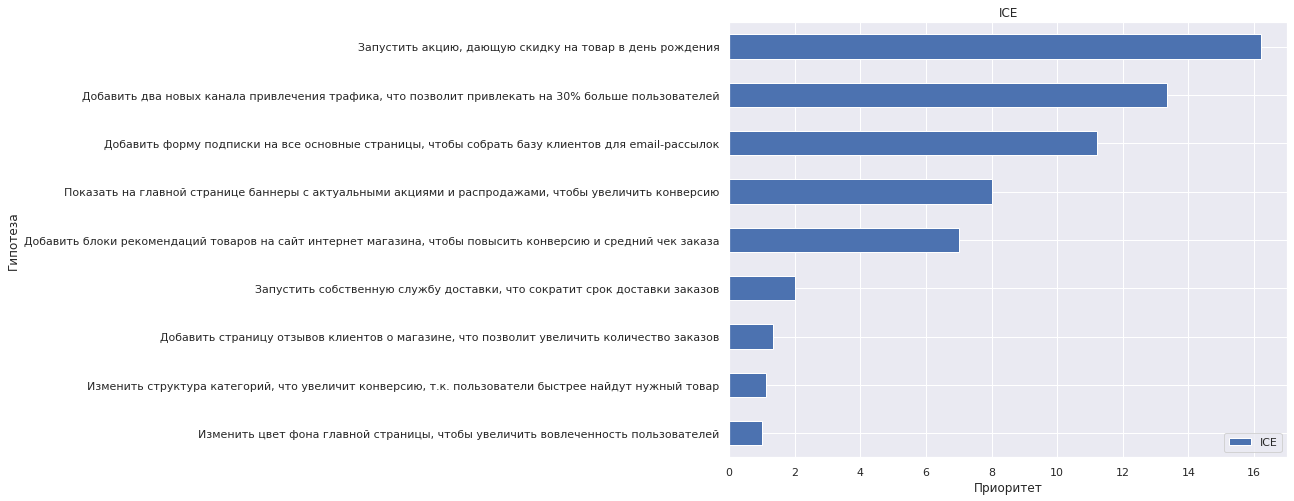

In [11]:
#нарисуем барплот для наглядности
ax = data[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE');

 При расчете ICE приоритетны №8 ('Запустить акцию, дающую скидку на товар в день рождения'), № 0 ('Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей ') и №7('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок') гипотезы.

In [12]:
# расчитаем RICE
data['RICE']= (data['reach']*data['impact']*data['confidence'])/data['efforts']
data.sort_values(by='RICE',ascending=False, inplace=True )
data

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


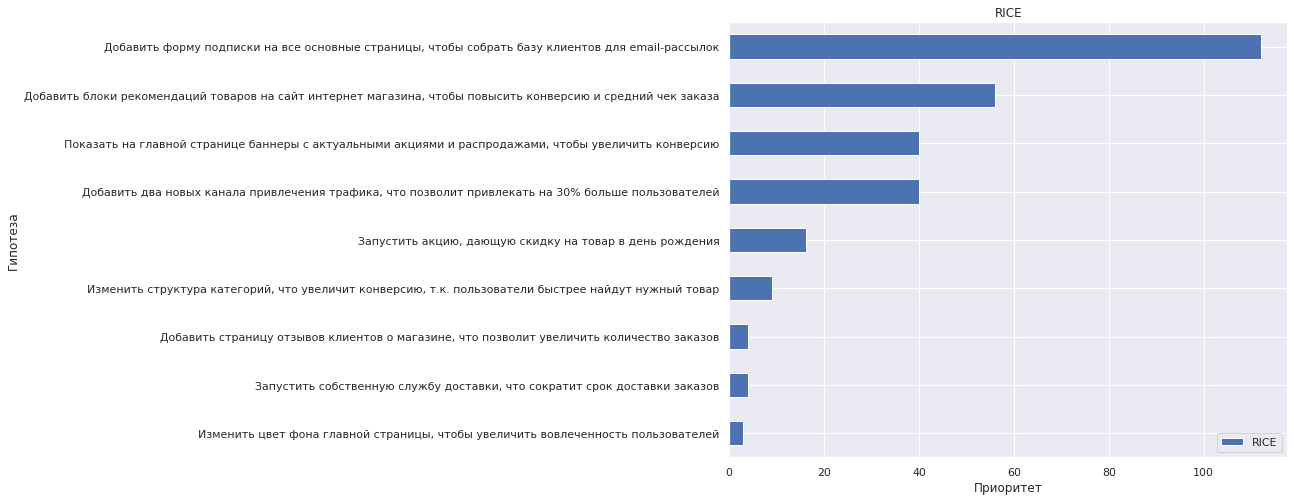

In [13]:
#нарисуем барплот для наглядности
ax = data[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

При расчете RICE приоритет гипотез сместился.На первое место вышла гипотеза №7('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'),
на 2 место гипотеза №2 ('Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа') и гипотезу № 0 ('Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	') оказалась на 3 месте.

Гипотеза №8 ('Запустить акцию, дающую скидку на товар в день рождения') сместилась с 1 на 5 место. Это неудивительно, так как охват у данной гипотезы всего 1. В то время как у гипотезы №7 ('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок') охват равен 10, поэтому данная гипотеза в приоритете.Так произошло, потому, что формулы разные, одна учитывает охват, а другая — нет.

## Часть 2. Анализ A/B-теста

In [14]:
#выведем таблицу orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [15]:
# выведем таблицу visitors
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Предварительно изучим количество заказов и посещений в каждой из групп.

In [16]:
# посчитаем количество посещений по группам
visitors[['visitors', 'group']].groupby('group').sum()

,visitors
group,
A,18736
B,18916


In [17]:
# посчитаем количество заказов по группам
orders[['visitorId', 'group']].groupby('group').count()

,visitorId
group,
A,557
B,640


В группе В на 180 посещений больше, чем в группе А. Проверим не попали ли некоторые пользователи в разные группы

In [18]:
# создают две переменные: «visitorsA» и «visitorsB»,
      #  в которых хранятся ID посетителей для группы A и группы B соответственно
visitorsA = orders[orders['group']=='A']['visitorId']
visitorsB = orders[orders['group']=='B']['visitorId']

In [19]:
#сделаем срез посетителей попавших одновременно в обе группы
visitors_AB = orders.loc[orders['visitorId'].isin(visitorsA)& orders['visitorId'].isin(visitorsB),'visitorId'].unique()
# узнаем сколько таких посетителей
visitors_AB_count = orders.loc[orders['visitorId'].isin(visitorsA)& orders['visitorId'].isin(visitorsB),'visitorId'].nunique()
print ('Id посетителей попавших в обе группы : ',visitors_AB)
print('-----------------------------------')
print ('Количество посетителей попавших в обе группы',visitors_AB_count)

Id посетителей попавших в обе группы :  [4069496402  963407295  351125977 3234906277  199603092  237748145
 3803269165 2038680547 2378935119 4256040402 2712142231    8300375
  276558944  457167155 3062433592 1738359350 2458001652 2716752286
 3891541246 1648269707 3656415546 2686716486 2954449915 2927087541
 2579882178 3957174400 2780786433 3984495233  818047933 1668030113
 3717692402 2044997962 1959144690 1294878855 1404934699 2587333274
 3202540741 1333886533 2600415354 3951559397  393266494 3972127743
 4120364173 4266935830 1230306981 1614305549  477780734 1602967004
 1801183820 4186807279 3766097110 3941795274  471551937 1316129916
  232979603 2654030115 3963646447 2949041841]
-----------------------------------
Количество посетителей попавших в обе группы 58


Вычистим таких пользователей из заказов

In [20]:
# было
(orders.groupby('visitorId')['group'].nunique()>1).count()

1031

In [21]:
# стало
orders = orders.loc[~orders['visitorId'].isin(visitors_AB)]
(orders.groupby('visitorId')['group'].nunique()>1).count()

973

In [22]:
orders[['visitorId', 'group']].groupby('group').count()

,visitorId
group,
A,468
B,548


Хотя разница в заказах между группами сократилась до 80, в процентном соотношении разница увеличилась. На данный момент мы ничего не можем сделать, чтобы это изменить. Однако учтем это на будущее и продолжим как есть.

### Построим график кумулятивной выручки по группам. 

In [23]:
#создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [24]:
# cоберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [25]:
# аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [26]:
# объединим обе таблицы в одной с понятными названиями столбцов
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [27]:
cummulativeData.sample(5)

,date,group,orders,buyers,revenue,visitors
7,2019-08-04,B,68,66,385740,2573
42,2019-08-22,A,339,321,2366147,13459
31,2019-08-16,B,307,302,2074677,10013
54,2019-08-28,A,434,413,3036933,16970
35,2019-08-18,B,327,321,2190865,11171


In [28]:
# построим графики кумулятивной выручки по дням и группам A/B-тестирования
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]
display(cumulativeRevenueA.sample(5), cumulativeRevenueB.sample(5))

,date,revenue,orders
38,2019-08-20,2103613,309
24,2019-08-13,1558426,214
42,2019-08-22,2366147,339
26,2019-08-14,1601692,231
36,2019-08-19,2044934,299


,date,revenue,orders
43,2019-08-22,4050134,401
21,2019-08-11,1321183,210
53,2019-08-27,4579312,473
39,2019-08-20,3768059,368
35,2019-08-18,2190865,327


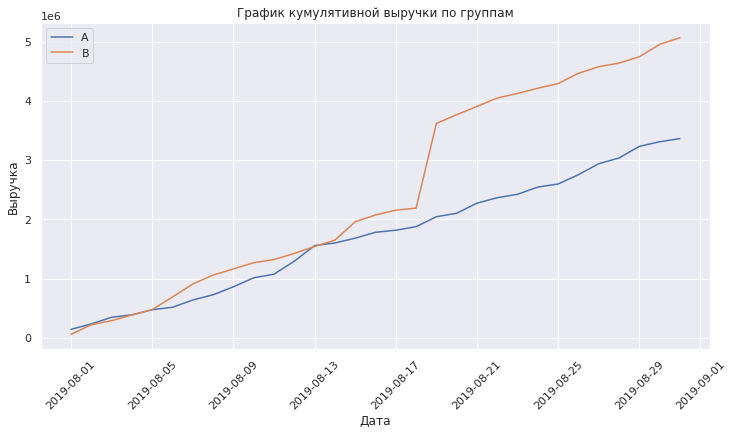

In [29]:
# построим графики кумулятивной выручки по дням и группам A/B-тестирования
plt.figure(figsize=(12, 6))
# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.legend();

В группе А наблюдается постепенный рост, тогда как в группе B после 17 августа произошел внезапный всплеск, возможно, из-за совершения значительных покупок.

### Построим график кумулятивного среднего чека по группам.

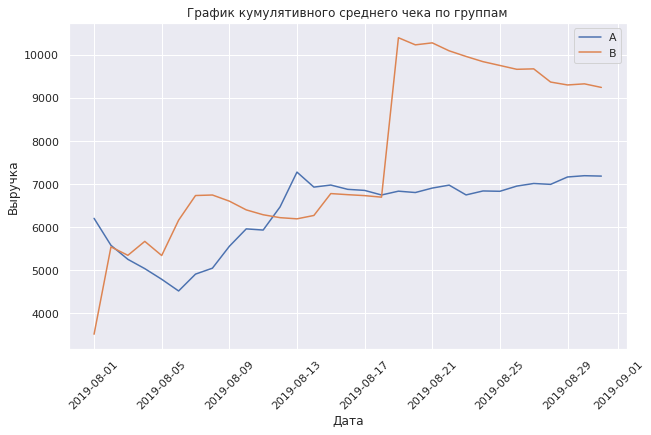

In [30]:
# построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.legend();

Устойчивая тенденция к более высокому среднему чеку группы B очевидна, но резкие и значительные колебания во второй половине графика вызывают подозрения о возможных аномалиях.Как видим, результаты среднего чека такие же, с 2019-08-17 резкий скачёк группы В, возможно во второй половине теста попали крупные заказы.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

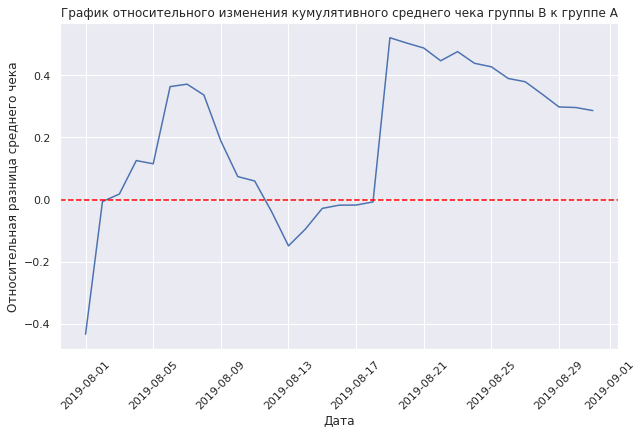

In [31]:
# построим график относительного различия для среднего чека
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', \
                                                   how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительная разница среднего чека')
plt.xticks(rotation=45);

In [32]:
mergedCumulativeRevenue

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89
5,2019-08-06,515332,114,690490,112
6,2019-08-07,638580,130,909654,135
7,2019-08-08,727219,144,1059795,157
8,2019-08-09,861456,155,1162961,176
9,2019-08-10,1013731,170,1268123,198


Дополнительные доказательства подтверждают наличие аномально больших заказов. Раньше я думала, что они присутствуют только после 17.08, но теперь подозреваю, что они могут существовать и ранее.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. 

In [33]:
# проанализируем график кумулятивной конверсии
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

In [34]:
# отделим данные по группам
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']


In [35]:
cummulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.03
2,2019-08-02,A,42,36,234381,1338,0.03
4,2019-08-03,A,66,60,346854,1845,0.04
6,2019-08-04,A,77,71,388030,2562,0.03
8,2019-08-05,A,99,92,474413,3318,0.03


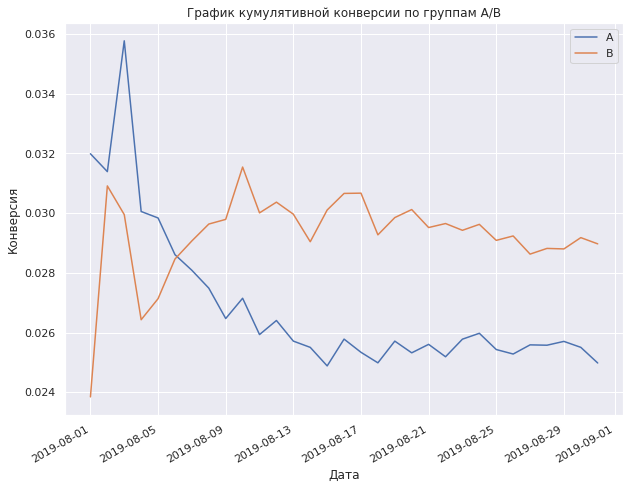

In [36]:
#построим график кумулятивной конверсии по группам A/B
fig = plt.figure()
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
fig.autofmt_xdate();

С начала месяца конверсия A была значительно больше, 3 августа она была максимальной за весь период наблюдения и после пика сразу пошла на спад. Конверсия группы B с 4 августа начала расти и уже 6 августа превысила конверсию A. Можно сделать вывод - конверсия группы B в целом значительно больше A (начиная с 6 августа стабильно конверсия B больше A).

### Построим график относительного различия кумулятивных конверсий

In [37]:
# объедеим две таблицы коммулятивной конверсии по группам
mergedCummulativeConversions = cummulativeDataA[['date', 'conversion']]\
.merge(cummulativeDataB[['date', 'conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])
mergedCummulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.03,0.02
1,2019-08-02,0.03,0.03
2,2019-08-03,0.04,0.03
3,2019-08-04,0.03,0.03
4,2019-08-05,0.03,0.03


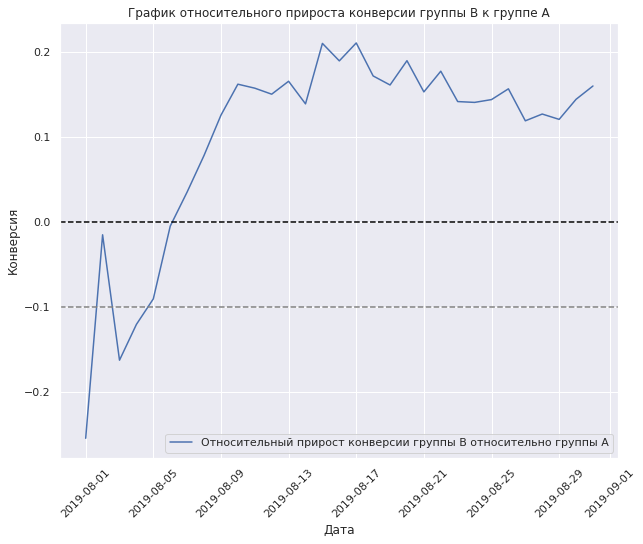

In [38]:
# отрисуем график относительного прироста конверсии группы B относительно группы A
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label = "Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('График относительного прироста конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.legend();

Конверсия в группе B стабильно выше конверсии в группе A

### Построим точечный график количества заказов по пользователям.

In [39]:
# подсчитаем количество заказов по пользователям и посмотрим на результат
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)


,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


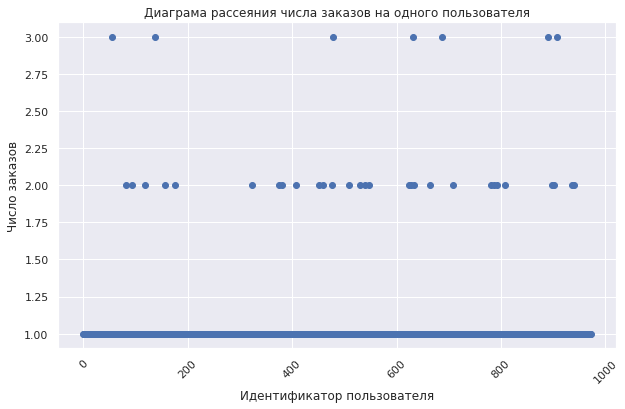

In [40]:
plt.figure(figsize=(10, 6))
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Диаграма рассеяния числа заказов на одного пользователя')
plt.xlabel('Идентификатор пользователя')
plt.ylabel('Число заказов')
plt.xticks(rotation=45);

 Есть пользователи, которые совершали 3 заказа. Но большинство пользователей с 1 или 2 заказами.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [41]:
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
# посчитаем выборочные перцентили количества заказов на одного пользователя
np.percentile(ordersByUsers['orders'], [90,95,99])


,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


array([1., 1., 2.])

Менее 5% пользователей сделали более двух заказов, и только 1% пользователей разместили более четырех заказов.

Чтобы выявить аномальных пользователей, мы можем установить минимальное требование — 2 заказа на пользователя и исключить тех, кто падает ниже этого порога.



### Построем точечный график стоимостей заказов.

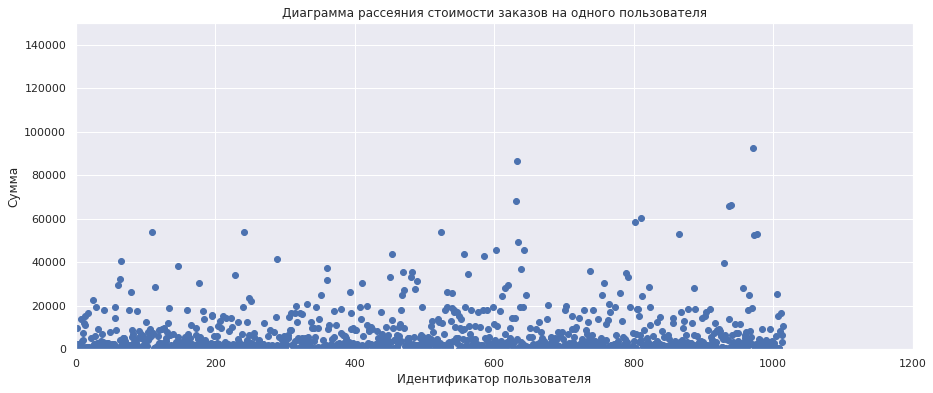

In [42]:
#строим диаграмму рассеяния стоимости заказов на одного пользователя
plt.figure(figsize=(15, 6))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма рассеяния стоимости заказов на одного пользователя')
# установим максимум и минимум осей 
plt.axis([0, 1200, 0, 150000])
plt.ylabel('Сумма')
plt.xlabel('Идентификатор пользователя');

Судя по графику, большая часть пользователей делает покупки суммой не больше 25-30 т.р. 

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [43]:
display(orders.sort_values(by='revenue', ascending=False).head(10))
# посчитаем выборочные перцентили количества заказов на одного пользователя
print(np.percentile(orders['revenue'], [90,95,99]))

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


[17990. 26785. 53904.]


Всего лишь 1% стоимости заказов больше 53904. Будем считать все что выше 53904 аномалиями.

Таким образом были изучены сырые данные и подготовлена таблица с данными заказов без аномалий. С учетом аномалий группа В казалась предпочтительнее, однако у неё были найдены аномалии. От которых мы благополучно избавились. Перейдем к заключительной части, постараемся наверняка узнать, какая из групп предпочтительнее.

## Статистическая значимость.

Для проверки будем использовать непараметрический критерий Манна-Уитни, так как данные распределены ненормально.

###  Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Сформулируем гипотезы.

**Нулевая гипотеза:**

H0 - Различий в среднем количестве заказов между группами A и B нет.

**Альтернативная гипотеза:**

H1 - Различия в среднем количестве заказов между группами есть.

**Уровень статистической значимости:**

alfa=0.05


In [44]:
# датафрейм с посетителями по дням в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
#переименуем столбцы
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [45]:
#cоберём кумулятивные по дням данные о количестве пользователей в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
#переименуем столбцы
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [46]:
# датафрейм с посетителями по дням в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
#переименуем столбцы
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [47]:
#соберём кумулятивные по дням данные о количестве пользователей в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
#переименуем столбцы
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [48]:
# cоберем данные о количестве заказов, суммарной выручке по дням в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
#переименуем столбцы
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


In [49]:
# cоберем данные о суммерном (коммулятивном) количестве заказов, суммарной выручке по дням в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
#переименуем столбцы
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


In [50]:
# cоберем данные о количестве заказов, суммарной выручке по дням в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
#переименуем столбцы
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [51]:
# cоберем данные о суммерном (коммулятивном) количестве заказов, суммарной выручке по дням в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
#переименуем столбцы
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


In [52]:
# объеденим полученные данные в один датафрейм

df = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
df.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [53]:
# cоздадим переменные ordersByUsersA и ordersByUsersB со столбцами,
# в которых для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
# переименуем столбцы
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsers.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [54]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
# переименуем столбцы
ordersByUsersB.columns = ['visitorId', 'orders']
ordersByUsersB.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [55]:
# объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
# тем, кто ничего не заказал, будут соответствовать нули.
sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0, index=np.arange(df['visitorsPerDateA']\
                                                .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
                     pd.Series(0, index=np.arange(df['visitorsPerDateB'].\
                                                  sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [56]:
# выведем  p_value и относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. 
#округлим до трёх знаков после запятой
print('P_value: ',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель 'B' и 'A' = ", '{0:.3f}'.format((df['ordersPerDateB'].sum()/df['visitorsPerDateB'].sum())/(df['ordersPerDateA'].sum()/df['visitorsPerDateA'].sum())-1))


P_value:  0.011
Относительный показатель 'B' и 'A' =  0.160


Вывод: p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: по «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 13.8% .

Видим, что p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу - отвергаем, можно сказать, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B равен 16%

Найдём относительные различия в среднем чеке между группами

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сформулируем гипотезы.

Нулевая гипотеза:

H0 - Различий в среднем чеке заказа между группами A и B нет.

Альтернативная гипотеза:

H1 - Различия в среднем чеке заказа между группами есть.

Уровень статистической значимости:

alfa=0.05

In [57]:
print('P_value: ','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель сренего чека по сырым данным 'B' и 'A' = ",'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P_value:  0.829
Относительный показатель сренего чека по сырым данным 'B' и 'A' =  0.287


P-value больше 0.05 - статистически значимых различий в среднем чеке между группами нет, но различие среднего чека между сегментами 28.7%

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 


In [58]:
# cделаем срезы пользователей с числом заказов больше 2 — и пользователей, совершивших заказы дороже 59 000
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64
(16,)


Всего 16 аномальных пользователей.

In [59]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
.isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df['visitorsPerDateA']
.sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

In [60]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].
isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df['visitorsPerDateB'].
sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам

In [61]:
print('P_value: ','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = ",'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P_value:  0.007
Относительный показатель 'B' и 'A' =  0.189


Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент В значительно лучше сегмента А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [62]:
print('P_value: ',"{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительный показатель 'B' и 'A' = ","{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P_value:  0.788
Относительный показатель 'B' и 'A' =  -0.032


p-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия,тоже нет (как и с "сырыми" данными). А вот средний чек группы B оказался незначительно (на ~ 0.3%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше аж на 28.7%,



## Примем решение по результатам теста и объясним его. 

По результатам тестирования было выявлено:

И по "сырым" и по "очищенным" данным различия в конверсии групп A и B есть. Относительный выигрыш группы B над A равен 18.9% по "очищенным" и 16% по "сырым" данным.

Оказалось, что и по "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 0.3%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше аж на ~29%. 

Исходя их обнаруженных фактов, тест следует остановить и признать его успешным, потому как при имеющихся данных сегмент B лучше сегмента A.
